# CO2 concentration in the atmosphere since 1958

## Scientific methodology Project : CO2 concentration in the atmosphere since 1958

### Introduction

Each month, CO2 athmospheric level is measured in the Mauna Loa observatory, in Hawaii. Data provided here combines measurements since 1958. In the context of this study, I’ll take the dataset of 15/01/20 (17h).

### About data

The provided data file consists of 10 columns. The first four columns (Columns 1-4) contain dates represented in various redundant formats. Column 5 displays monthly Mauna Loa CO2 concentrations, measured in micro-mol CO2 per mole (ppm), using the 2008A SIO manometric mole fraction scale—this is the commonly sought standard version of the data. The monthly values are adjusted to 24:00 hours on the 15th day of each month. In Column 6, the same data is presented after undergoing a seasonal adjustment to eliminate the quasi-regular seasonal cycle. This adjustment entails subtracting a 4-harmonic fit with a linear gain factor from the data.

Moving on, Column 7 showcases a smoothed version of the data, derived from a stiff cubic spline function along with 4-harmonic functions incorporating a linear gain. Column 8 is identical to Column 7's smoothed version but with the seasonal cycle removed. Column 9 replicates the content of Column 5, with the distinction that missing values in Column 5 are filled with corresponding values from Column 7. Similarly, Column 10 mirrors the data in Column 6, with missing values replaced by values from Column 8. It's worth noting that missing values are indicated by -99.99.

### The (accepted) mission

    1. Make a plot that shows the superposition of a periodic oscillation and a slower systematic evolution.Separate these two phenomena. Characterize the periodic oscillation.
    2. Find a simple model for the slow contribution, estimate its parameters, and attempt an extrapolation until 2025 (for validating the model using future observations).
    
### How to use Jupyter/Python to clean data

We’ll start with downloading dataset from Scripps CO2 Program.

In [1]:
data_url= "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"

import pandas to read and analyse data.
as first 44 rows are comment so we skip them. 
File has no header so header=None.

In [2]:
import pandas as pd

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=44, header=None, names=["date","CO2"])

In [4]:
raw_data

date     CO2
0     1958-03-29  316.19
1     1958-04-05  317.31
2     1958-04-12  317.69
3     1958-04-19  317.58
4     1958-04-26  316.48
5     1958-05-03  316.95
6     1958-05-17  317.56
7     1958-05-24  317.99
8     1958-07-05  315.85
9     1958-07-12  315.85
10    1958-07-19  315.46
11    1958-07-26  315.59
12    1958-08-02  315.64
13    1958-08-09  315.10
14    1958-08-16  315.09
15    1958-08-30  314.14
16    1958-09-06  313.54
17    1958-11-08  313.05
18    1958-11-15  313.26
19    1958-11-22  313.57
20    1958-11-29  314.01
21    1958-12-06  314.56
22    1958-12-13  314.41
23    1958-12-20  314.77
24    1958-12-27  315.21
25    1959-01-03  315.24
26    1959-01-10  315.50
27    1959-01-17  315.69
28    1959-01-24  315.86
29    1959-01-31  315.42
...          ...     ...
3317  2023-03-25  420.87
3318  2023-04-01  421.33
3319  2023-04-08  422.20
3320  2023-04-15  423.02
3321  2023-04-22  422.99
3322  2023-04-29  423.95
3323  2023-05-06  423.76
3324  2023-05-13  423.78
3325  2023-05-20  422.77
3326  2023-05-27  424.44
3327  2023-06-03  424.40
3328  2023-06-10  424.01
3329  2023-06-17  422.93
3330  2023-06-24  422.21
3331  2023-07-01  422.80
3332  2023-07-08  422.32
3333  2023-07-15  421.43
3334  2023-07-22  420.74
3335  2023-07-29  420.88
3336  2023-08-05  420.39
3337  2023-08-12  420.30
3338  2023-08-19  418.96
3339  2023-08-26  418.84
3340  2023-09-02  418.50
3341  2023-09-09  418.28
3342  2023-09-16  418.52
3343  2023-09-23  417.77
3344  2023-09-30  417.89
3345  2023-10-07  418.10
3346  2023-10-14  418.82

[3347 rows x 2 columns]

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [date, CO2]
Index: []

In [6]:
raw_data['CO2']

0       316.19
1       317.31
2       317.69
3       317.58
4       316.48
5       316.95
6       317.56
7       317.99
8       315.85
9       315.85
10      315.46
11      315.59
12      315.64
13      315.10
14      315.09
15      314.14
16      313.54
17      313.05
18      313.26
19      313.57
20      314.01
21      314.56
22      314.41
23      314.77
24      315.21
25      315.24
26      315.50
27      315.69
28      315.86
29      315.42
         ...  
3317    420.87
3318    421.33
3319    422.20
3320    423.02
3321    422.99
3322    423.95
3323    423.76
3324    423.78
3325    422.77
3326    424.44
3327    424.40
3328    424.01
3329    422.93
3330    422.21
3331    422.80
3332    422.32
3333    421.43
3334    420.74
3335    420.88
3336    420.39
3337    420.30
3338    418.96
3339    418.84
3340    418.50
3341    418.28
3342    418.52
3343    417.77
3344    417.89
3345    418.10
3346    418.82
Name: CO2, Length: 3347, dtype: float64

In [7]:
data = raw_data.dropna().copy()
data

date     CO2
0     1958-03-29  316.19
1     1958-04-05  317.31
2     1958-04-12  317.69
3     1958-04-19  317.58
4     1958-04-26  316.48
5     1958-05-03  316.95
6     1958-05-17  317.56
7     1958-05-24  317.99
8     1958-07-05  315.85
9     1958-07-12  315.85
10    1958-07-19  315.46
11    1958-07-26  315.59
12    1958-08-02  315.64
13    1958-08-09  315.10
14    1958-08-16  315.09
15    1958-08-30  314.14
16    1958-09-06  313.54
17    1958-11-08  313.05
18    1958-11-15  313.26
19    1958-11-22  313.57
20    1958-11-29  314.01
21    1958-12-06  314.56
22    1958-12-13  314.41
23    1958-12-20  314.77
24    1958-12-27  315.21
25    1959-01-03  315.24
26    1959-01-10  315.50
27    1959-01-17  315.69
28    1959-01-24  315.86
29    1959-01-31  315.42
...          ...     ...
3317  2023-03-25  420.87
3318  2023-04-01  421.33
3319  2023-04-08  422.20
3320  2023-04-15  423.02
3321  2023-04-22  422.99
3322  2023-04-29  423.95
3323  2023-05-06  423.76
3324  2023-05-13  423.78
3325  2023-05-20  422.77
3326  2023-05-27  424.44
3327  2023-06-03  424.40
3328  2023-06-10  424.01
3329  2023-06-17  422.93
3330  2023-06-24  422.21
3331  2023-07-01  422.80
3332  2023-07-08  422.32
3333  2023-07-15  421.43
3334  2023-07-22  420.74
3335  2023-07-29  420.88
3336  2023-08-05  420.39
3337  2023-08-12  420.30
3338  2023-08-19  418.96
3339  2023-08-26  418.84
3340  2023-09-02  418.50
3341  2023-09-09  418.28
3342  2023-09-16  418.52
3343  2023-09-23  417.77
3344  2023-09-30  417.89
3345  2023-10-07  418.10
3346  2023-10-14  418.82

[3347 rows x 2 columns]

In [63]:
data1 = raw_data.dropna().copy()

## Plot CO2 Evolution
 
 So now, we’ll use matplotlib to represent more clearly evolution of CO2 concentration.

In [8]:
import matplotlib.pyplot as plt

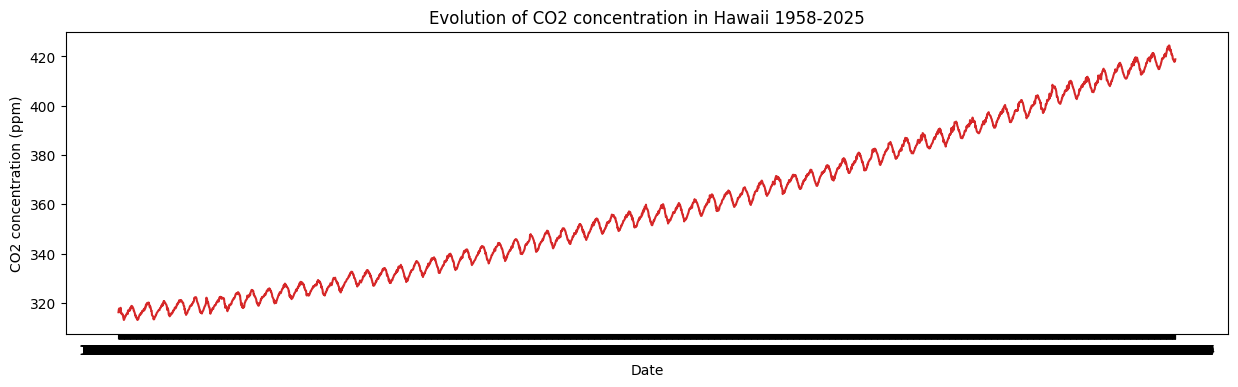

In [17]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='CO2 concentration (ppm)', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(data, x=data['date'], y=data['CO2'], title='Evolution of CO2 concentration in Hawaii 1958-2025')

The curve that I have is the same as the Wikipedia’s one. I guess it’s a good sign. This figure show the global evolution, but as we can see, we have some periodic evolution too. It can be fun to show that to complete first mission. But i Don't know HOW?
So I tried different grouping method.
I grouped the data month wise to plot oscilation more precisely.

In [18]:
date_df=pd.to_datetime(data["date"], yearfirst=True)

In [20]:
data.insert(2, "month", date_df.dt.month)

In [23]:
data.insert(3, "year", date_df.dt.year)

In [24]:
data

date     CO2  month  year
0     1958-03-29  316.19      3  1958
1     1958-04-05  317.31      4  1958
2     1958-04-12  317.69      4  1958
3     1958-04-19  317.58      4  1958
4     1958-04-26  316.48      4  1958
5     1958-05-03  316.95      5  1958
6     1958-05-17  317.56      5  1958
7     1958-05-24  317.99      5  1958
8     1958-07-05  315.85      7  1958
9     1958-07-12  315.85      7  1958
10    1958-07-19  315.46      7  1958
11    1958-07-26  315.59      7  1958
12    1958-08-02  315.64      8  1958
13    1958-08-09  315.10      8  1958
14    1958-08-16  315.09      8  1958
15    1958-08-30  314.14      8  1958
16    1958-09-06  313.54      9  1958
17    1958-11-08  313.05     11  1958
18    1958-11-15  313.26     11  1958
19    1958-11-22  313.57     11  1958
20    1958-11-29  314.01     11  1958
21    1958-12-06  314.56     12  1958
22    1958-12-13  314.41     12  1958
23    1958-12-20  314.77     12  1958
24    1958-12-27  315.21     12  1958
25    1959-01-03  315.24      1  1959
26    1959-01-10  315.50      1  1959
27    1959-01-17  315.69      1  1959
28    1959-01-24  315.86      1  1959
29    1959-01-31  315.42      1  1959
...          ...     ...    ...   ...
3317  2023-03-25  420.87      3  2023
3318  2023-04-01  421.33      4  2023
3319  2023-04-08  422.20      4  2023
3320  2023-04-15  423.02      4  2023
3321  2023-04-22  422.99      4  2023
3322  2023-04-29  423.95      4  2023
3323  2023-05-06  423.76      5  2023
3324  2023-05-13  423.78      5  2023
3325  2023-05-20  422.77      5  2023
3326  2023-05-27  424.44      5  2023
3327  2023-06-03  424.40      6  2023
3328  2023-06-10  424.01      6  2023
3329  2023-06-17  422.93      6  2023
3330  2023-06-24  422.21      6  2023
3331  2023-07-01  422.80      7  2023
3332  2023-07-08  422.32      7  2023
3333  2023-07-15  421.43      7  2023
3334  2023-07-22  420.74      7  2023
3335  2023-07-29  420.88      7  2023
3336  2023-08-05  420.39      8  2023
3337  2023-08-12  420.30      8  2023
3338  2023-08-19  418.96      8  2023
3339  2023-08-26  418.84      8  2023
3340  2023-09-02  418.50      9  2023
3341  2023-09-09  418.28      9  2023
3342  2023-09-16  418.52      9  2023
3343  2023-09-23  417.77      9  2023
3344  2023-09-30  417.89      9  2023
3345  2023-10-07  418.10     10  2023
3346  2023-10-14  418.82     10  2023

[3347 rows x 4 columns]

In [81]:
data1["date"] = pd.to_datetime(data1["date"])
df2 = data1.groupby(data1['date'].dt.to_period('M')).sum()
df1 = df2.resample('M').asfreq().dropna()

In [82]:
df1

CO2
date            
1958-03   316.19
1958-04  1269.06
1958-05   952.50
1958-07  1262.75
1958-08  1259.97
1958-09   313.54
1958-11  1253.89
1958-12  1258.95
1959-01  1577.71
1959-02   950.17
1959-03   950.25
1959-04  1270.80
1959-05  1273.53
1959-06  1272.31
1959-07  1266.30
1959-08  1259.68
1959-09  1255.49
1959-10  1567.20
1959-11  1259.61
1959-12  1262.33
1960-01  1582.10
1960-02  1268.01
1960-03  1270.56
1960-04  1595.76
1960-05  1279.88
1960-06  1278.05
1960-07  1590.47
1960-08  1263.20
1960-09  1256.91
1960-10  1569.40
...          ...
2021-05  2094.30
2021-06  1674.67
2021-07  2082.55
2021-08  1656.32
2021-09  1651.87
2021-10  2068.19
2021-11  1659.59
2021-12  1665.62
2022-01  2089.99
2022-02  1675.98
2022-03  1673.86
2022-04  2099.78
2022-05  1682.89
2022-06  1682.69
2022-07  2092.94
2022-08  1666.61
2022-09  1662.16
2022-10  2076.95
2022-11  1668.25
2022-12  1256.62
2023-01  1677.25
2023-02  1681.26
2023-03  1682.14
2023-04  2113.49
2023-05  1694.75
2023-06  1693.55
2023-07  2108.17
2023-08  1678.49
2023-09  2090.96
2023-10   836.92

[783 rows x 1 columns]

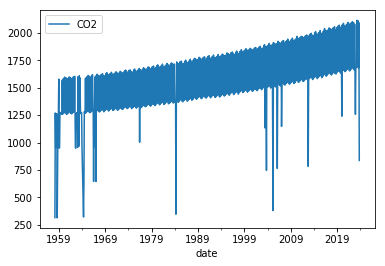

In [83]:
df1.plot()

I plot a graph with 6 years data.

In [87]:
yearly_5_data1=df1.head(60)

In [88]:
yearly_5_data1

CO2
date            
1958-03   316.19
1958-04  1269.06
1958-05   952.50
1958-07  1262.75
1958-08  1259.97
1958-09   313.54
1958-11  1253.89
1958-12  1258.95
1959-01  1577.71
1959-02   950.17
1959-03   950.25
1959-04  1270.80
1959-05  1273.53
1959-06  1272.31
1959-07  1266.30
1959-08  1259.68
1959-09  1255.49
1959-10  1567.20
1959-11  1259.61
1959-12  1262.33
1960-01  1582.10
1960-02  1268.01
1960-03  1270.56
1960-04  1595.76
1960-05  1279.88
1960-06  1278.05
1960-07  1590.47
1960-08  1263.20
1960-09  1256.91
1960-10  1569.40
1960-11  1260.11
1960-12  1581.19
1961-01  1267.79
1961-02  1270.75
1961-03  1274.18
1961-04  1597.27
1961-05  1282.10
1961-06  1279.22
1961-07  1591.95
1961-08  1267.26
1961-09  1575.45
1961-10  1261.60
1961-11  1264.28
1961-12  1585.12
1962-01  1271.96
1962-02  1274.73
1962-03  1598.74
1962-04  1282.43
1962-05  1283.88
1962-06  1602.68
1962-07  1277.81
1962-08   953.40
1962-09   948.29
1962-10  1262.00
1962-11  1266.43
1962-12  1270.34
1963-01  1274.99
1963-02   957.09
1963-03  1599.48
1963-04  1285.31

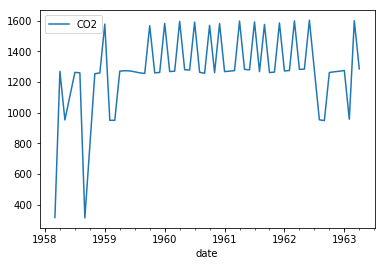

In [89]:
yearly_5_data1.plot()

Then I grouped the data year wise and plot a graph for all data.

In [90]:
df3 = data1.groupby(data1['date'].dt.to_period('Y')).sum()
df3 = df3.resample('Y').asfreq().dropna()

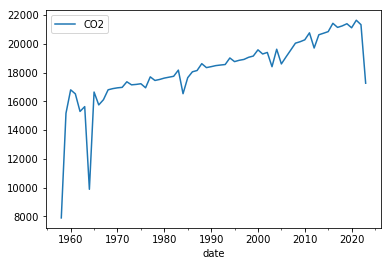

In [91]:
df3.plot()

I plot a graph with 5 years data.

In [93]:
yearly_5_data=df3.head(5)

In [94]:
yearly_5_data

CO2
date          
1958   7886.85
1959  15165.38
1960  16795.64
1961  16516.97
1962  15292.69

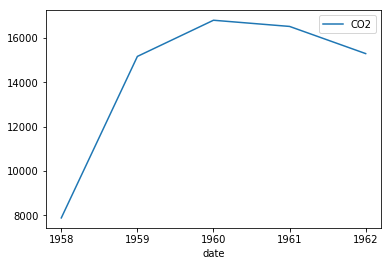

In [95]:
yearly_5_data.plot()

Let’s make an interval. We need first the maximum and minimum value of CO2 concentration for each month. We can translate that with this SQL request :

In [ ]:
pip install pandasql

In [ ]:
from pandasql import sqldf

In [ ]:
newdata_df=sqldf('SELECT year, MIN(CO2),MAX(CO2) FROM data GROUP BY year')

In [ ]:
newdata_df

make a graph forminimum and maximum CO2 concentration

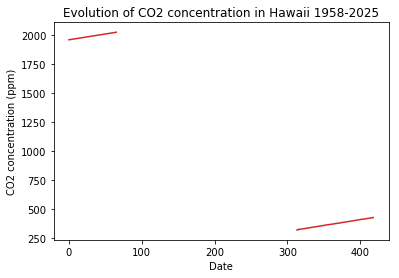

In [103]:
def plot_df(x1, x2,y, title="", xlabel='Date', ylabel='CO2 concentration (ppm)'):
    plt.plot(x1, x2,y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df( x1=newdata_df['MIN(CO2)'],x2=newdata_df['MAX(CO2)'],y=newdata_df['year'], title='Evolution of CO2 concentration in Hawaii 1958-2025')

Still I'm not sure it's the right oscilation or not so i draw it using sine curve for complete data

In [107]:
import numpy as np

In [108]:
amplitude   = np.sin(data["CO2"])

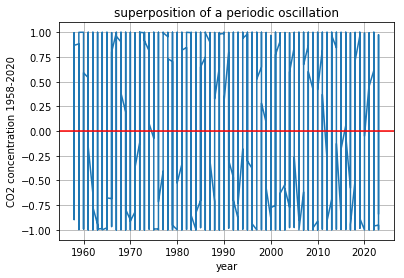

In [123]:
plt.plot(data["year"], amplitude)
plt.title('superposition of a periodic oscillation')
plt.xlabel('year')
plt.ylabel('CO2 concentration 1958-2020')
plt.grid(True, which='both')
plt.axhline(y=0, color='R')
plt.show()

Now I draw the sine curve for 7 years

In [118]:
sin_data=data.head(300)

In [119]:
amplitude_sin   = np.sin(sin_data["CO2"])

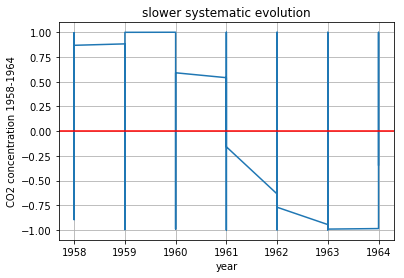

In [124]:
plt.plot(sin_data["year"], amplitude_sin)
plt.title('slower systematic evolution')
plt.xlabel('year')
plt.ylabel('CO2 concentration 1958-1964')
plt.grid(True, which='both')
plt.axhline(y=0, color='R')
plt.show()

# make some regressions for prediction

In [133]:
features=np.array([data["month"],data["year"]])

In [137]:
feature=np.array(data["year"])

In [138]:
feature

array([1958, 1958, 1958, ..., 2023, 2023, 2023])

In [141]:
feature=feature.reshape(-1,1)

In [134]:
features

array([[   3,    4,    4, ...,    9,   10,   10],
       [1958, 1958, 1958, ..., 2023, 2023, 2023]])

In [143]:
from sklearn.linear_model import LinearRegression

# Training data
X = (feature)  # features
y = data["CO2"]  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=data["year"].index)

In [144]:
y_pred

0       305.214859
1       305.214859
2       305.214859
3       305.214859
4       305.214859
5       305.214859
6       305.214859
7       305.214859
8       305.214859
9       305.214859
10      305.214859
11      305.214859
12      305.214859
13      305.214859
14      305.214859
15      305.214859
16      305.214859
17      305.214859
18      305.214859
19      305.214859
20      305.214859
21      305.214859
22      305.214859
23      305.214859
24      305.214859
25      306.846076
26      306.846076
27      306.846076
28      306.846076
29      306.846076
           ...    
3317    411.243981
3318    411.243981
3319    411.243981
3320    411.243981
3321    411.243981
3322    411.243981
3323    411.243981
3324    411.243981
3325    411.243981
3326    411.243981
3327    411.243981
3328    411.243981
3329    411.243981
3330    411.243981
3331    411.243981
3332    411.243981
3333    411.243981
3334    411.243981
3335    411.243981
3336    411.243981
3337    411.243981
3338    411.

In [145]:
model.predict(2025)

array([414.50641544])